<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/cnn/notebooks/Fish_GCMS_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [2]:
drive.mount('/content/drive')
data_path_gdrive = '/content/drive/MyDrive/AI/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the data from Google drive.
# instance = "1 - SNA1 Frame A.csv"
# instance = "1 - SNA1 Frame B.csv"
# instance = "1 - SNA1 Frame C.csv"
instance = "2 - GUR2  Frame A.csv" 
path = os.getcwd()
folder = "drive/MyDrive/AI/Data"
file_path = os.path.join(path, folder, instance)
assert os.path.exists(file_path), f"File at {file_path} does not exist."
data = pd.read_csv(file_path)

# Extract the relevant columns - the mass spectometry data. 
ms_columns = range(2, data.shape[1])
data = data.iloc[:,ms_columns]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Min-max scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(data)
scaled = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled, columns=data.columns)
largest_intensity = max(scaled_df.max().tolist())
assert largest_intensity <= 1.0, f"The largest intensity: {largest_intensity} should be less than or equal to 1."
smallest_intensity = min(scaled_df.min().tolist())
assert smallest_intensity >= 0, f"The smallest intensity: {smallest_intensity} should be greater than or equal to 0."
scaled_df = scaled_df.transpose() # Swap rows and columns for time on x-axis.
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
Packet #0,0.030864,0.221605,0.211728,0.264198,0.183333,0.244444,0.250617,0.287037,0.193210,0.168519,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN
Packet #1,0.005137,0.040189,0.032836,0.000000,0.034549,0.037470,0.037268,0.044420,0.036463,0.033139,...,0.000000,0.025886,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN
Packet #2,0.007636,0.000000,0.000000,0.000000,0.000000,0.050808,0.037298,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN
Packet #3,0.001083,0.019210,0.011587,0.012650,0.013488,0.018024,0.015184,0.018351,0.020334,0.015572,...,0.005681,0.000000,0.006192,0.005436,0.0,0.0,0.006682,0.0,NaN,NaN
Packet #4,0.000397,0.003518,0.003158,0.004253,0.004400,0.002894,0.002497,0.004576,0.003379,0.004121,...,0.000000,0.002439,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN


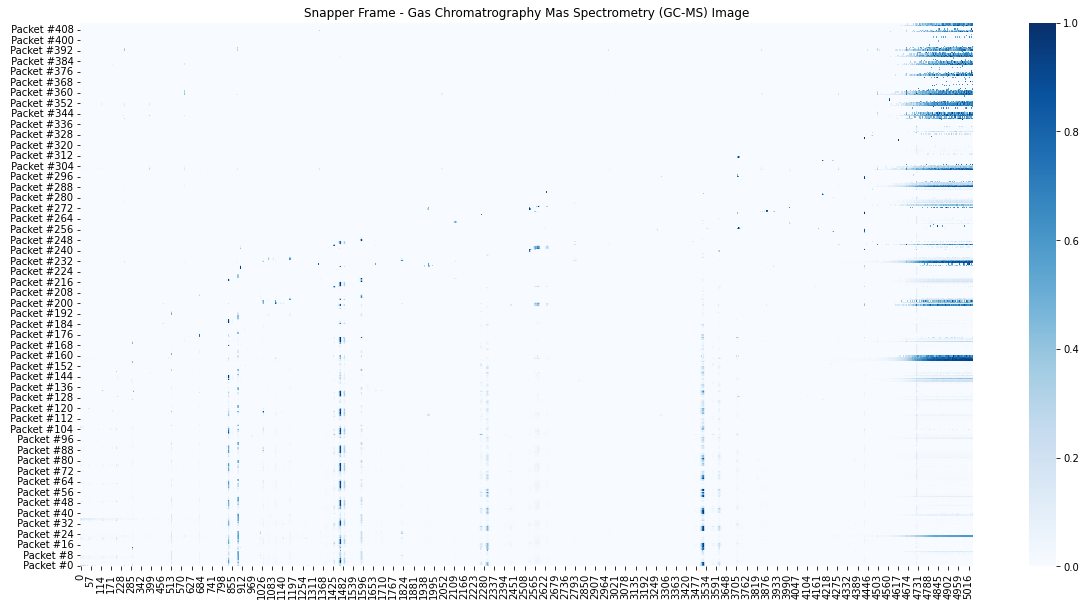

In [5]:
# Plot a heatmap image of the Snapper Frame instance. 
plt.figure(figsize=(20,10))
plt.title("Snapper Frame - Gas Chromatrography Mas Spectrometry (GC-MS) Image")
plt.xlabel("Timestamp")
plt.ylabel("Intensity (scaled)")
ax = sns.heatmap(scaled_df, cmap="Blues")
ax.invert_yaxis() # Reverse order of y-axis (source: https://bit.ly/3rS2hk6)